In [3]:
%matplotlib inline
import numpy as np
from scipy import integrate
import matplotlib.pyplot as plt


/opt/python/2.7.10/lib/python2.7/site-packages/ipykernel/__main__.py:15: RuntimeWarning: overflow encountered in square
/opt/python/2.7.10/lib/python2.7/site-packages/ipykernel/__main__.py:15: RuntimeWarning: invalid value encountered in square
/opt/python/2.7.10/lib/python2.7/site-packages/ipykernel/__main__.py:19: RuntimeWarning: invalid value encountered in less


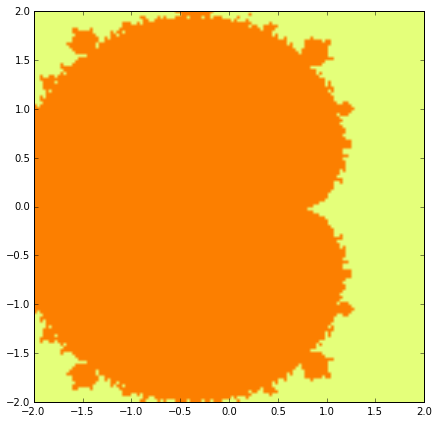

/opt/python/2.7.10/lib/python2.7/site-packages/ipykernel/__main__.py:32: RuntimeWarning: overflow encountered in square
/opt/python/2.7.10/lib/python2.7/site-packages/ipykernel/__main__.py:32: RuntimeWarning: invalid value encountered in square
/opt/python/2.7.10/lib/python2.7/site-packages/ipykernel/__main__.py:33: RuntimeWarning: overflow encountered in absolute
/opt/python/2.7.10/lib/python2.7/site-packages/ipykernel/__main__.py:33: RuntimeWarning: invalid value encountered in greater


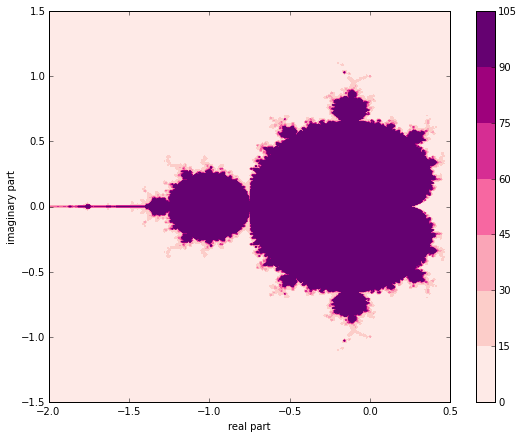

In [26]:
#Question 1

#set up arrays
x = np.arange(-2., 2., 0.01)
y = np.arange(-2., 2., 0.01)

def compute_mandelbrot(x, y):
    '''Function that generates the Mandelbrot set'''
    #generate real and complex plane
    c = x[:,np.newaxis] + 1j*y[np.newaxis,:]
    z = c
    #pass values through the function f(z)=z**2+c a given number of times
    N = 100
    for j in range(N):
        z = z**2 + c
    #create an array where bounded stuff comes back True and 
    #nonbounded stuff comes back False
    threshold = 2.
    mandelbrot_set = (abs(z) < threshold)
    return mandelbrot_set

def colored_mandelbrot(x, y):
    '''megafunction that generates and plots the Mandelbrot set with divergences'''
    #generate real and complex plane
    c = x[:,np.newaxis] + 1j*y[np.newaxis,:]
    ones = np.ones(np.shape(c), np.int)
    #build array that holds colours for the plot
    N = 100
    color = ones * N 
    z = 0
    for n in range(N):
        z = z**2 + c
        diverged = np.abs(z)>2
        # colour the divergences
        color[diverged] = np.minimum(color[diverged], ones[diverged]*n)
    #set up the graph
    import pylab as p
    p.rcParams['figure.figsize'] = [9, 7]
    p.contourf(c.real, c.imag, color, cmap='RdPu')
    p.colorbar()
    p.xlabel("real part")
    p.ylabel("imaginary part")
    p.xlim(-2,0.5)
    p.ylim(-1.5,1.5)
    p.savefig("Mandel_div.png")
    p.show()

#create Mandelbrot arrays
#full size image
mandelbrot_set = compute_mandelbrot(x, y)
#zoomed in view to illustrate self similar structure
mandelbrot_set_zoomed = compute_mandelbrot(x[:int(len(x)/2)], y[:int(len(y)/2)])
#another zoomed in view to illustrate self similar structure
mandelbrot_set_zoomed_2 = compute_mandelbrot(x[int(len(x)/3):int(2*len(x)/3)], y[int(len(x)/3):int(2*len(x)/3)])

#create images
plt.imshow(mandelbrot_set.T, cmap='cool', extent=[-2, 2, -2, 2])
plt.savefig('Mandel_01.png')
plt.imshow(mandelbrot_set_zoomed.T, cmap='spring', extent=[-2, 2, -2, 2])
plt.savefig('Mandel_02.png')
plt.imshow(mandelbrot_set_zoomed_2.T, cmap='Wistia', extent=[-2, 2, -2, 2])
plt.savefig('Mandel_03.png')
plt.show()
#call colored_mandelbrot() megafunction
colored_mandelbrot(x, y)

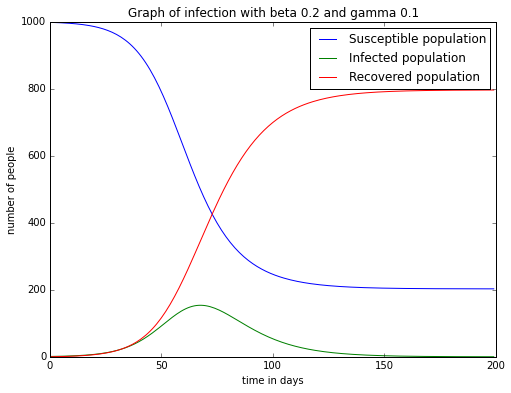

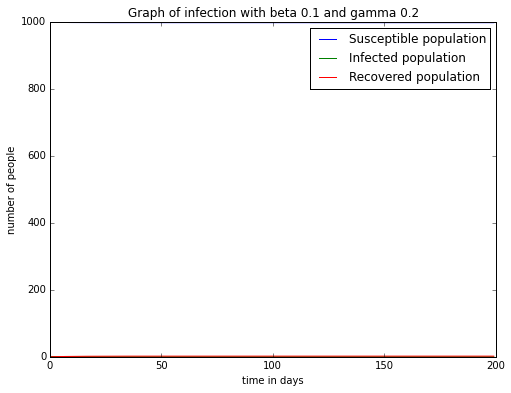

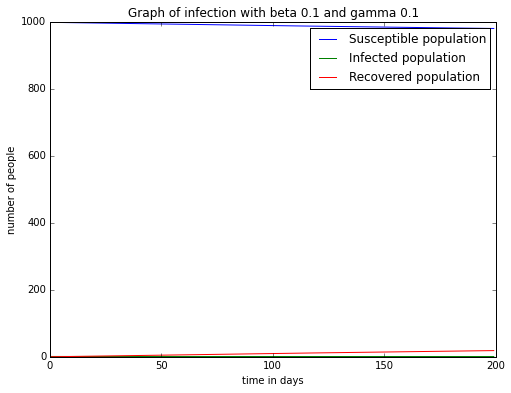

In [5]:
#Question 2
import scipy.integrate as integrate
import scipy
#establish initial values
I0 = 1
S0 = 999
R0 = 0
N = 1000
#create time array
time = np.arange(0,200,1)

# The SIR model differential equations.
def deriv(y, t, N, beta, gamma):
    S, I, R = y
    dSdt = -beta * S * I / N
    dIdt = beta * S * I / N - gamma * I
    dRdt = gamma * I
    return dSdt, dIdt, dRdt 

def solve_and_graph(beta, gamma):
    '''Megafunction that solves deriv above and plots 
    the results for different beta and gamma
    '''
    # Initial conditions vector
    y0 = S0, I0, R0
    # Integrate the SIR equations over the time grid, t.
    ret = scipy.integrate.odeint(deriv, y0, time, args=(N, beta, gamma))
    S, I, R = ret.T
    #plot the curves
    plt.figure(figsize=(8,6))
    plt.plot(time, S, label = 'Susceptible population')
    plt.plot(time, I, label = 'Infected population')
    plt.plot(time, R, label = 'Recovered population')
    plt.title('Graph of infection with beta '+ str(beta)+' and gamma '+str(gamma))
    plt.xlabel('time in days')
    plt.ylabel('number of people')
    plt.legend()
    if beta > gamma:
        s = 'beta_greater'
    if beta < gamma:
        s = 'beta_less'
    elif beta == gamma:
        s = 'beta_gamma_equal'
    plt.savefig(s+'.png')
    plt.show()
    
#test values for beta and gamma
bg_tests = [(0.2, 1./10), (0.1, 0.2), (0.1, 0.1)]
for test in bg_tests:
    solve_and_graph(test[0], test[1])